# Assignment 6: Classification with Logistic Regression

# Total: 20 pts

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

## The Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

You can read more about the data and the variables [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [2]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: 1 pt

Read in the `diabetes.csv` dataset. How many variables and how many observations? 


In [3]:
diabete = pd.read_csv("diabetes.csv")
diabete

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Question 2: 1 pt

Then split the data into train and test for the outcome and the predictor variables.  Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [55]:
X = diabete.drop("Outcome",axis = "columns").astype("float").values
y = diabete.Outcome.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size=0.5, 
                                                random_state=0)





## Question 3: 1 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?  If it does, does this mean that `LogisticRegression` actually uses ridge regression or the LASSO as the default?

* What is the interpretation of the paramater `C`?  How does it relate to the regularization strength $\lambda$?


* If I were to ask you to use a regularization strengh of 2 (i.e. $\lambda=2$), what value of `C` would you pass?

Answer in the cell below using markdown

1 yes, it use l2 regulization. it actually use the ridge regression.

2 the parameter c is Inverse regularization parameter - A control variable that retains strength modification of Regularization by being inversely positioned to the Lambda regulator. it is the 1/$\lambda$.

3 the c i should pass is 0.5.




Answers go here!

## Question 4: 3 pts

Create a instance of sklearn's `LogisticRegression` object for simple logistic regression (that is, the unpenalized version).  You will need to choose an alternative solver for `LogisticRegression` since the default solver does not support the no penalty option. Any solver will do, so just take a look at the docs to see what is available. I used `solver="newton-cg"` which seems to work fine.

Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

Using this object, run a logisitic regression analysis of `Outcome` (y-variable) against `Glucose` (x-variable) on your training data. Make a scatter-plot of x and y and add the class prediction (0 or 1, using `predict`) and the predicted probability of a positive outcome (using `predict_proba`). Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1).

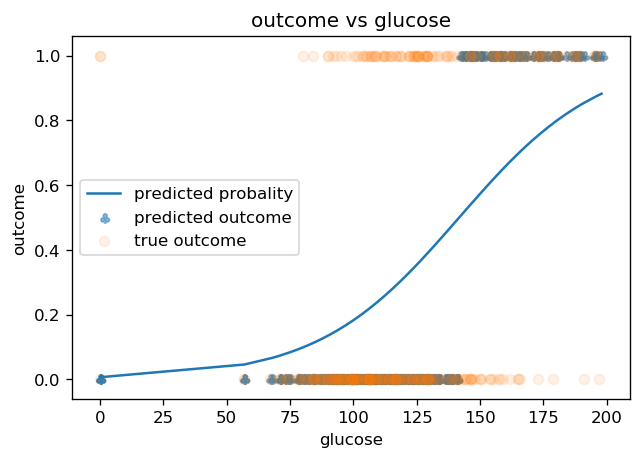

In [20]:
#we create the object and use solver being newton and let penalty be none.
LR = LogisticRegression(solver='newton-cg', penalty ='none',max_iter=10000)
#here we only need to fit the glucose with outcome in training data.
LR.fit(Xtrain[:,1].reshape(-1,1),ytrain)
#predict the probality 
y_pred_prob = LR.predict_proba(Xtrain[:,1].reshape(-1,1))
#predict the outcome.
y_pred = LR.predict(Xtrain[:,1].reshape(-1,1))
df = pd.DataFrame({'Glucose': Xtrain[:,1], 
                   'outcome': y_pred_prob[:,1],
                 })
fig,ax = plt.subplots(dpi = 120)
plt.scatter(Xtrain[:,1],y_pred,alpha=0.5, marker=r'$\clubsuit$',label = "predicted outcome")
plt.scatter(Xtrain[:,1],ytrain,label = "true outcome",alpha = 0.1)
ax.set_xlabel('glucose')
ax.set_ylabel('outcome')
ax.set_title('outcome vs glucose')
newdf = df.sort_values(by=['Glucose'])
plt.plot(newdf.Glucose,newdf.outcome,label = "predicted probality")
ax.legend()




## Question 5: 1 pt
Using the normal logistic regression from Question 4 to fit a model to predict outcome from all the variables in the data frame. Report the coefficients. Which variable increases the probability of having diabetes, and which variables decrease the probability of having diabetes. 

In [53]:
#fit iwth all variables.
display(diabete)
LR.fit(Xtrain,ytrain)
LR.coef_





,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


array([[ 0.09842824,  0.0321267 , -0.00774474,  0.00496926, -0.00134285,
         0.0802594 ,  1.09714438,  0.01828915]])

the 8 variable we can get is as followed, we can see that the pregnancies,glucose,skin skickness, BMI, DiabetesPedigreefunction
and age has positive effect on devoloping diabetes.
nowever the bloodpressure and insulin has negative effect on devoloping into diabetes.




## Question 6: 3 pts

Use your model to construct a confusion matrix by fitting and predicting on the training data (I've inlcluded a little helper function to make looking at the confusion matrix a little easier). Then answer the following using the confusion matrix (don't use sklearn's functions):

* What is your model's training accuracy?
* What is your model's training precision?
* What is your model's training recall?

In [25]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    ax.axis('equal')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax

Confusion matrix, without normalization
the model accuracy is 


0.75

the model precision is 


0.711340206185567

the model recall rate is 


0.5036496350364964

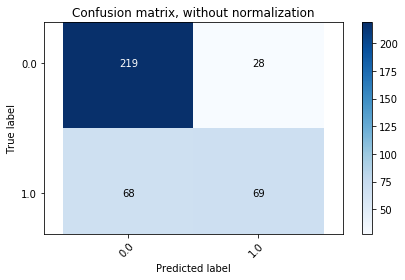

In [26]:
plot_confusion_matrix(ytrain,y_pred,classes = np.array([0.0,1.0]))
con_matrix = confusion_matrix(ytrain, y_pred)
model_accuracy = np.diag(con_matrix).sum()/con_matrix.sum()
print("the model accuracy is ")
display(model_accuracy)
print("the model precision is ")
model_precision = con_matrix[1,1]/np.sum(con_matrix[:,1])
display(model_precision)
print("the model recall rate is ")
model_recall = con_matrix[1,1]/np.sum(con_matrix[1,:])
display(model_recall)




## Question 7:  1 pts

Estimate logistic regression's out of sample recall by using 5 fold cross validation.

In [27]:
cv_scores = cross_val_score(LogisticRegression(solver='newton-cg', penalty ='none',max_iter=10000), Xtrain, ytrain, cv = 5, scoring=make_scorer(recall_score))


In [32]:
print(f"the cross validation score is {cv_scores.mean():.3f}")



the cross validation score is 0.547


## Question 8: 1 pt

Create new pipelines for l2 penalty in logistic regression and an l1 penalty.  Remember, penalized models perform best when you scale the inputs.  You should add `StandardScaler()` to your pipeline.

In [33]:
pipe_l1 = Pipeline([
    ("standardlize",StandardScaler()),
    ('logistic_regression', LogisticRegression(solver='liblinear', 
                                               penalty = 'l1',
                                               max_iter=10000))
])



pipe_l2 = Pipeline([
    ("standardlize",StandardScaler()),
    ('logistic_regression', LogisticRegression(solver='newton-cg', 
                                               penalty = 'l2',
                                               max_iter=10000))
])





## Question 9: 3 pts

  Use sklearn's `GridSearchCV` to search over the regularization strength ranging from 0.1 to 1000 in 30 evenly spaced increments for your models. Vary the parameter evenly in log-space. Use recall as your metric for scoring.  
Plot the score for both lasso and ridge as a function of the log-regularization parameter. 

`GridSearchCV` is a way to cross validate your models for a variety of parameters.  Read more about `GridSearchCV` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [34]:
#set up the grid
lamda = np.linspace(0.1,1000,30)
#transform the penalty factor lamda to c.
c = {'c': 1/lamda}
#iterate every c in the grid and get the optimized lasso 
lasso_cv = GridSearchCV(pipe_l1, 
                          param_grid=c, 
                          cv = 5,
                          scoring=make_scorer(recall_score),
                          n_jobs=-1,
                          iid = True)


ridge_cv = GridSearchCV(pipe_l2 , 
                          param_grid=c, 
                          cv = 5,
                          scoring=make_scorer(recall_score),
                          n_jobs=-1,
                          iid = True)


lasso_cv.fit(Xtrain, ytrain);
ridge_cv.fit(Xtrain, ytrain);






## Question 10: 1 pt

Print the cross validated recall for your regularized models.  If you called your model grid search `lasso_gscv` you can access the best model's score by performing `lasso_gscv.best_score_`.


In [38]:
print(f"the lasso_cross_validation is {lasso_cv.best_score_:2f}")

print(f"the lasso_cross_validation is {ridge_cv.best_score_:2f}")


the lasso_cross_validation is 0.598428
the lasso_cross_validation is 0.547419


## Question 11: 4 pts

LASSO makes the assumption that the model is what we call *sparse* (that means, not every variable is actually related to the outcome).  We can see which variables are more important than others by examining what is known as the *coefficient paths*.

Here are the steps to create the coefficient path:

1) Initialize an array of regularization strengths (typically going from something very small, maybe 0.1, to something very large, maybe 1000.

2) For each regularization strength, fit your model.  Keep track of the coefficients somehow, either by initializing an empty array to store the coefficients or by appending them to a list.

3) Plot the coefficient values against the log of the regularization strength.

For an example + example code - see Lab05 - last item. 

You've done this correctly if you can create a plot which looks like [this](https://cvxpy.readthedocs.io/en/latest/_images/lasso_regression_11_0.svg).

* Construct the coefficient path for logistic regression with an l1 penalty.
* Determine which coefficient is most strongly related to the outcome by examining which coefficent reaches 0 last.


(-4, 4.950557949937199)

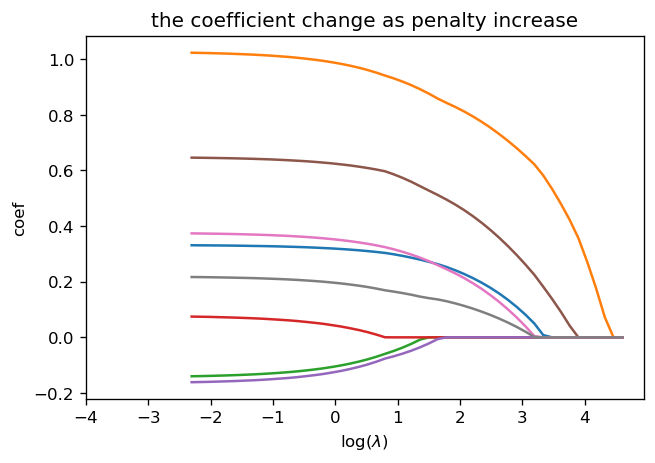

In [54]:
regularization_strengths = np.logspace(-1, 2, 50)

coefs = np.zeros((regularization_strengths.size, X.shape[1]))


for i,L in enumerate(regularization_strengths):
    lasso_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('logistic_regression', LogisticRegression(penalty = 'l1', 
                                               solver='liblinear', 
                                               max_iter=10000,
                                               C = 1/L)) 
    ])
    
    lasso_pipe.fit(Xtrain, ytrain)
    coefs[i] = lasso_pipe.named_steps['logistic_regression'].coef_



fig, ax = plt.subplots(dpi = 120)
ax.plot(np.log(regularization_strengths), coefs)
ax.set_xlabel(r'$\log(\lambda)$')
ax.set_ylabel('coef')
ax.set_title('the coefficient change as penalty increase')
ax.set_xlim(-4,None)


#from the plot we can get the red line shrink first to 0, combine with the line we get the question 5, we know that the 
#redline has lowest positive value when lambda is 0, which corresponding the SkinThickness in the question 5
#so we can derive that the SkinThickness the most strongly related to improve of penalty.

from the plot we can get the red line shrink first to 0, combine with the line we get the question 5, we know that the redline has lowest positive value when lambda is 0, which corresponding the SkinThickness in the question 5
so we can derive that the SkinThickness the most strongly related to improve of penalty.